## Loading Data set

In [1]:
!cp '/content/drive/MyDrive/Transaction_Naration_Data_Set.csv' '/content/sample_data/'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/sample_data/Transaction_Naration_Data_Set.csv')

In [4]:
data

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.00,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.00,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.00,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.00,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
...,...,...,...,...,...,...
22546753,22546753,4010919,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546754,22546754,2607145,2550.00,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit
22546755,22546755,5728508,2550.00,29-APR-23,Credit Against Merchant Cash Withdraw Service ...,Credit
22546756,22546756,5939099,1512.75,29-APR-23,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [5]:
data.columns

Index(['Unnamed: 0', 'AC_ID', 'AMOUNT', 'DOC_DATE', 'NARATION', 'DR_CR'], dtype='object')

In [6]:
narration = data['NARATION'].to_frame()

In [7]:
narration

,NARATION
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
4,"Cash withdraw from Micro Merchant point, MM A/C"
...,...
22546753,Credit Against Merchant Cash Withdraw Service ...
22546754,"Cash withdraw from Micro Merchant point, MM A/C"
22546755,Credit Against Merchant Cash Withdraw Service ...
22546756,"Cash withdraw from Micro Merchant point, MM A/C"


In [8]:
SAMP_CNT = 20
narration.sample(n=SAMP_CNT)

,NARATION
21876690,Cash Withdrawal From A/C No.:
18389948,Credit Against Merchant Cash Withdraw Service ...
14554754,Debit Against Palli Bidyut Bill Collection.
20709944,Inter Agent Cash Withdraw
2968256,Credit Against Merchant Cash Withdraw Service ...
12979320,Debit Against Palli Bidyut Bill Collection.
12224539,NPSB Fund Transfer. NPS IncommingNPS IB
15294435,Cash Deposit
6950005,SMS Charge Deduction For The Year
17739797,Debit against passport fee collection A-Challa...


In [9]:
narration.describe()

,NARATION
count,22545735
unique,128603
top,Cash Withdrawal From A/C No.:
freq,2359719


In [10]:
unique_narrations = narration.drop_duplicates()

In [11]:
del data, narration

In [12]:
unique_narrations.sample(n=SAMP_CNT)


,NARATION
1618825,Withdraw Against Inter Branch Cash Deposit(Abu...
18093754,DAKBANGLAPARA MOHILA PUD-Deposit
10302893,SUJAN
7554977,IBCA FOR CREDITING THE AMT. TO A/C: FVG. MD. ...
4217962,"Ctsu_ For Usd . @ Mashreqbank Psc., New York ..."
19804836,Withdraw Against Name:Muttaki Lasani Std Id: S...
14997475,"Smart App, Fund Transfer. Feb , Manha Rahman M..."
14402828,Cash Deposit SUMON MIA
4784589,Unpaid salary disbursement for the M/O November-
4515429,"EFTN Transaction, Bangladesh Krishi Bank, NAND..."


In [13]:
unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)

<ipython-input-13-8da7a7b2cb53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_narrations.rename(columns = {'NARATION' : 'text'}, inplace = True)


## Named Entity Recognition

In [ ]:
unique_narrations

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,Guatala Udc
22539045,"Transaction For Fund Transfer. Smart App, Regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা


In [ ]:
! python -m spacy download en_core_web_lg

2023-05-26 09:26:41.728522: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 09:26:42.551124: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from spacy import displacy
from spacy import tokenizer
import en_core_web_lg
nlp = en_core_web_lg.load()


In [ ]:
text = 'Abdur Rahman is an employee'
doc = nlp(text)
print(doc)

Abdur Rahman is an employee


In [ ]:
list(doc.ents)

[Abdur Rahman]

In [ ]:
for x in doc:
  print(x)

Abdur
Rahman
is
an
employee


In [ ]:
def removeEntity(s):
  s = str(s)
  doc = nlp(s)
  names = [x.text for x in doc.ents]
  # print(names)
  for n in names:
    s = s.replace(str(n),'')
  return s

In [ ]:
unique_narrations_nr = unique_narrations.copy(deep=True)
unique_narrations_nr['text'] = unique_narrations_nr['text'].apply(removeEntity)

In [ ]:
unique_narrations_nr

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from point, /C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,
22539045,". , Regular Fund Transfer To A/C: ."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ এর কাছে জমা


In [ ]:
unique_narrations

,text
0,Cash Withdraw
1,Cash Withdrawal From A/C No.:
2,"Cash withdraw from Micro Merchant point, MM A/C"
3,Credit Against Merchant Cash Withdraw Service ...
6,Cash Deposit to A/C No.:
...,...
22538287,Guatala Udc
22539045,"Transaction For Fund Transfer. Smart App, Regu..."
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা


## Cleaning

In [14]:
# unique_narrations = unique_narrations_nr

In [15]:
SAMP_CNT = 10

In [16]:
unique_narrations['text'] = unique_narrations['text'].apply(lambda z : str(z).lower())
unique_narrations.sample(n=SAMP_CNT)

<ipython-input-16-6d266d56a44a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_narrations['text'] = unique_narrations['text'].apply(lambda z : str(z).lower())


,text
1945878,profit by voucer no re---/- from a/c no.:
4969997,withdraw against setara begum (bearer doc. ...
8966807,sotonizampur purus polli unnoyon dol sonchoi: ...
18219289,"agent name: md. abdul khaleque sikder, no ward..."
17207651,balunda purus polly uinnon dol asol
4461921,elder honorarium disbursement for the m/o nove...
11030637,"cap (smart app), regular fund transfer. decemb..."
19775155,. saleha savings
14756956,withdraw against cash deposit nid: a/c no.:
13750170,withdraw against cash deposit dulal ahmed a/c...


In [17]:
unique_narrations['text'] = unique_narrations['text'].replace( r'[^A-Za-z ]+', '', regex=True)

<ipython-input-17-0237404501a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_narrations['text'] = unique_narrations['text'].replace( r'[^A-Za-z ]+', '', regex=True)


In [18]:
unique_narrations.describe()
unique_narrations = unique_narrations.drop_duplicates()

In [19]:
unique_narrations.describe()

,text
count,112414
unique,112414
top,cash withdraw
freq,1


In [20]:
import nltk
nltk.download('punkt')
unique_narrations_tokenized = unique_narrations.copy(deep=True)
unique_narrations_tokenized['text'] = unique_narrations_tokenized['text'].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [21]:
del unique_narrations

In [22]:
unique_narrations_tokenized.sample(n=SAMP_CNT)

,text
12242531,"[eftn, transaction, pubali, bank, ltd, hajigan..."
2540316,"[oliduzzaman, uttara, branch, cheque, ad]"
13999190,"[agent, banking, cash, deposit, faridgonj, bra..."
4145154,"[trf, from, to]"
12262109,"[agent, banking, cash, withdrawal, barura, bra..."
5517919,"[smart, app, fund, transfer, shawon, matbar]"
6633537,"[eftn, transaction, bangladesh, krishi, bank, ..."
10423707,"[merongloa, mohila, polli, unnayan, dol, sonsoy]"
15955137,"[md, rasel, hossainmobile, no]"
4783771,"[agent, fund, management, to, ac, no]"


In [23]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

unique_narrations_lemmatized = unique_narrations_tokenized.copy(deep=True)
unique_narrations_lemmatized['text'] = unique_narrations_lemmatized['text'].apply(lambda z : [lemmatizer.lemmatize(x) for x in z])


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [24]:
del unique_narrations_tokenized

In [25]:
# samples_tokenized = unique_narrations_tokenized.sample(n=SAMP_CNT * 2)
# samples_lemmatized = unique_narrations_lemmatized.iloc[samples_tokenized.index[0]]
# print(samples_tokenized, samples_lemmatized)

In [26]:
# samples_tokenized.index

In [27]:
unique_narrations_lemmatized.sample(n=SAMP_CNT * 2)


,text
7782768,"[inter, agent, cash, deposit, abdus, soburgila..."
6252057,"[hazi, awwal, cheque, ac]"
13137350,"[salary, for, the, mo, january]"
2095788,"[cap, smart, app, regular, fund, transfer, abu..."
3227636,"[eftn, transaction, pubali, bank, ltd, bonosre..."
4991081,"[cash, depositoffice, rent, and, water, bill, ..."
8772246,"[inter, agent, cash, deposit, shahidul]"
17182757,"[paschim, bilpabla, m, p, u, d, saving, loan, ..."
9166271,"[inter, agent, cash, deposit, by, md, al, amin]"
2285782,"[eftn, transaction, the, premier, bank, ltd, b..."


In [28]:
print(unique_narrations_lemmatized)

                                                       text
0                                          [cash, withdraw]
1                          [cash, withdrawal, from, ac, no]
2         [cash, withdraw, from, micro, merchant, point,...
3         [credit, against, merchant, cash, withdraw, se...
6                               [cash, deposit, to, ac, no]
...                                                     ...
22534198  [transaction, for, fund, transfer, smart, app,...
22534938  [cap, smart, app, regular, fund, transfer, toa...
22535747  [cap, smart, app, regular, fund, transfer, ani...
22536483             [cash, deposit, suraighat, bazar, sme]
22539045  [transaction, for, fund, transfer, smart, app,...

[112414 rows x 1 columns]


In [29]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [30]:
unique_narrations_stop_word_removed = unique_narrations_lemmatized.copy(deep=True)
unique_narrations_stop_word_removed['text'] = unique_narrations_stop_word_removed['text'].apply(lambda z : [word for word in z if word not in stop])

In [31]:
del unique_narrations_lemmatized

In [32]:
print(unique_narrations_stop_word_removed)

                                                       text
0                                          [cash, withdraw]
1                                    [cash, withdrawal, ac]
2          [cash, withdraw, micro, merchant, point, mm, ac]
3           [credit, merchant, cash, withdraw, service, ac]
6                                       [cash, deposit, ac]
...                                                     ...
22534198  [transaction, fund, transfer, smart, app, regu...
22534938  [cap, smart, app, regular, fund, transfer, toa...
22535747  [cap, smart, app, regular, fund, transfer, ani...
22536483             [cash, deposit, suraighat, bazar, sme]
22539045  [transaction, fund, transfer, smart, app, regu...

[112414 rows x 1 columns]


## Exploration After Cleaning

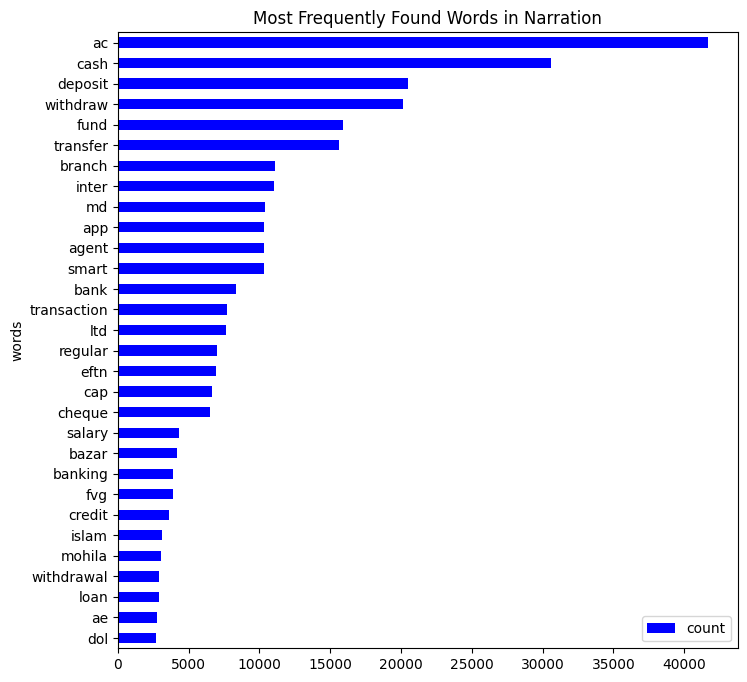

In [33]:
df = unique_narrations_stop_word_removed
n = 30
import itertools
import collections
import pandas as pd
import matplotlib.pyplot as plt
lemmatized_tokens = list(df['text'])
token_list = list(itertools.chain(*lemmatized_tokens))
counts_no = collections.Counter(token_list)
top_words = pd.DataFrame(counts_no.most_common(n), columns = ['words', 'count'])
fig, ax = plt.subplots(figsize=(8,8))
top_words.sort_values(by='count').plot.barh(x = 'words', y = 'count', ax = ax, color = 'blue')
ax.set_title('Most Frequently Found Words in Narration')
plt.show()

In [34]:
print(f'total unique words: {len(counts_no)}')

total unique words: 38429


## Embedding Word2Vec

### Pre Trained w2v

In [35]:
!pip install gensim
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import gensim
from gensim.models import Word2Vec

In [38]:
!cp  '/content/drive/MyDrive/word2vec-google-news-300.gz' '/content/'


In [39]:
model = gensim.models.KeyedVectors.load_word2vec_format("/content/word2vec-google-news-300.gz", binary=True)

In [40]:
'hello' in model

True

In [43]:
import numpy as np
dim = 300
def getSentEmbedding(txt):
  # print(type(txt))
  s = np.zeros(dim)
  for x in txt:
    y = str(x)
    if y in model:
      s += model[y]
  l = len(txt)
  return (s / l) if l != 0 else s

In [44]:
df = unique_narrations_stop_word_removed
df['embedding'] = df['text'].apply(getSentEmbedding)

# df['vector'] = df['text'].apply(lambda x : model)

In [45]:
encodings = df['embedding'].values

In [46]:
import numpy as np
encodings = np.vstack(encodings)

In [47]:
encodings.shape

(112414, 300)

## Sentence Transoformers (End to End)

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

<bound method NDFrame.last of                                                    NARATION
0                                             Cash Withdraw
1                            Cash Withdrawal From A/C No.: 
2          Cash withdraw from Micro Merchant point, MM A/C 
3         Credit Against Merchant Cash Withdraw Service ...
6                                 Cash Deposit to A/C No.: 
...                                                     ...
22538287                                       Guatala Udc 
22539045  Transaction For Fund Transfer. Smart App, Regu...
22539930                 Cash Deposit গারামাসি উল্লী উন্নয়ন
22543261                  আসাদ ভাই এর কাছে জমা  হাজার টাকা 
22544595  গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস  সেবা  আদ...

[128604 rows x 1 columns]>

### Lang Detection

In [ ]:
!pip install langid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=3ff6f8cb974e5d3a96e9bad799f3728b02fd98473e4d84ed9a43ab840eca8487
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid


In [ ]:
import langid
langid.classify("জাকির মোমিন রবিউল উকিল আলামিন শাহাদত আনিছ মোট  হাজার টাকা নভেম্বর মাস")

('bn', -446.38835191726685)

In [ ]:
cnt = 0
for i in range(uniques.shape[0]):
  text = uniques.iloc[i]['NARATION']
  try:
    lang = langid.classify(text)[0]
    if(lang == 'bn'):
      cnt += 1
      # print(text)
      # print(lang)
  except Exception as error :
    print(text, lang, i)
    # print(lang)
    print(error)
    break

print(cnt)

831


In [ ]:
model.encode(['THis is a sentence'])

In [ ]:
arr = uniques.loc[:,'NARATION'].values

In [ ]:
arr


In [ ]:
type(arr)

numpy.ndarray

In [ ]:
enocdings = model.encode(arr)

In [ ]:
enocdings

array([[ 0.00188374,  0.04863172, -0.02690281, ...,  0.01412175,
        -0.00927342, -0.04137693],
       [-0.07740939,  0.0434949 , -0.01827168, ..., -0.03888908,
        -0.06046326,  0.00504448],
       [ 0.02279887,  0.03478767, -0.03007546, ..., -0.03131324,
        -0.08227921, -0.01777196],
       ...,
       [ 0.02806198,  0.010154  , -0.05075606, ...,  0.04637393,
         0.04741295, -0.0801269 ],
       [ 0.07406023,  0.0173737 , -0.09031081, ...,  0.0308701 ,
         0.06341256, -0.05154131],
       [ 0.0792704 , -0.01986493, -0.07471365, ..., -0.01642665,
         0.06073492, -0.05393577]], dtype=float32)

In [ ]:
enocdings[0]

In [ ]:
encodings = enocdings

## Klustering

In [62]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [48]:

norm = np.linalg.norm(encodings, axis = 1, keepdims = True)
norm[norm == 0] = 1
norm_encodings = encodings / norm

In [57]:
clustering_model = KMeans(n_clusters=4)
kmeans = clustering_model.fit(norm_encodings)
cluster_assignment = clustering_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
silhouette_score(norm_encodings, kmeans.predict(norm_encodings))

0.15471546219247023

In [70]:
def getErrs(start, end):
  errs = []
  scores = []
  for i in range(start, end + 1):
    kmeans = KMeans(n_clusters=i).fit(norm_encodings)
    centroids = kmeans.cluster_centers_
    cluster_assignment = kmeans.predict(norm_encodings)
    centroids_assignment = centroids[cluster_assignment]
    dist = np.linalg.norm(norm_encodings - centroids_assignment, axis = 1, keepdims = True)
    err = np.sum(dist ** 2)
    errs.append(err)
    score = silhouette_score(norm_encodings, cluster_assignment)
    scores.append(score)
  return errs, scores

In [66]:
errs, scores = getErrs(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [67]:
errs

[49184.73482776732,
 47106.84694041191,
 44756.40984360759,
 42910.546751372305,
 41200.56697353391,
 39870.278813468634,
 39229.23123482737,
 38042.81191579772,
 37328.375855518745,
 36814.216059661194,
 36015.655210669014,
 35495.4219134945,
 35174.585015596545,
 34385.14443618013,
 34241.133912972415,
 33386.88126240853]

In [ ]:
errs.reverse()

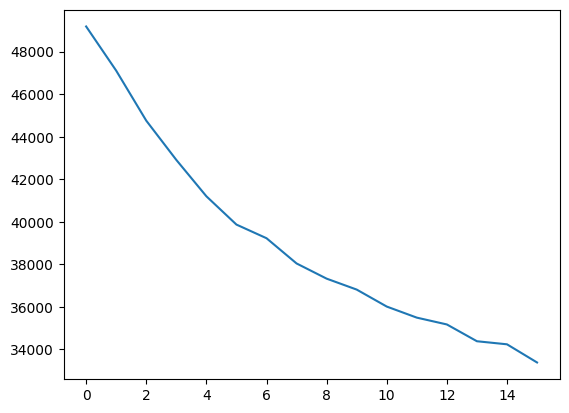

In [68]:
import matplotlib.pyplot as plt

plt.plot(errs)

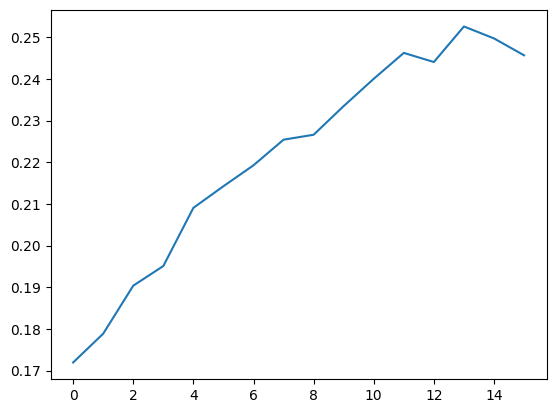

In [69]:
import matplotlib.pyplot as plt

plt.plot(scores)